# Extract the Mel Frequency Cepstral Coeﬃcients (MFCC)

Extracción de coeficientes cepstrales de frecuencia Mel de los archivos de audio.

In [1157]:
# Importaciones de librerias:

In [1158]:
import librosa
import speechpy
import numpy as np
import librosa.display
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

In [1159]:
# Variables globales:

In [1160]:
path_audio = r'../../data/audio/filter/268_16_ee05cc4e.wav'
audio_mono = True
using_cmvnw = True
load_scipy = False

n_mels = 40
n_mfcc = 13
n_fff = 1024
window = 'hamming'
sample_rate = 44100
hop_length = 0.023
win_length = 0.011

In [1161]:
# Carga del archivo de audio:

In [1162]:
def load_audio ():
    return wav.read(path_audio) if load_scipy else librosa.load(path_audio, mono=audio_mono, sr=sample_rate)

In [1163]:
# MFCC mediante librosa:

In [1164]:
def get_mfcc_librosa (signal, sample_rate):
    mel = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_fft=n_fff,
                                         hop_length=int(np.ceil(hop_length * sample_rate)),
                                         win_length=int(np.ceil(win_length * sample_rate)),
                                         window=window, n_mels=n_mels)
    return librosa.feature.mfcc(S=librosa.power_to_db(mel), sr=sample_rate, n_mfcc=n_mfcc)

In [1165]:
# MFCC mediante speechpy:

In [1166]:
def get_mfcc_speechpy (signal, sample_rate):
    return speechpy.feature.mfcc(signal, sampling_frequency=sample_rate,
                                 frame_length=hop_length, frame_stride=win_length,
                                 num_cepstral=n_mfcc, num_filters=n_mels,
                                 fft_length=n_fff)

In [1167]:
# Obtención de los MFCC:

In [1168]:
def get_MFCC ():
    if load_scipy:
        sample_rate, signal = load_audio()
    else:
        signal, sample_rate = load_audio()
    return get_mfcc_speechpy(signal, sample_rate) if load_scipy else get_mfcc_librosa(signal, sample_rate)

In [1169]:
# Normalización de los MFCC:

In [1170]:
def normalize_MFCC (mfcc):
    if not load_scipy:
        mfcc = np.transpose(mfcc)
    normalize = speechpy.processing.cmvn(mfcc,variance_normalization=True)
    if not load_scipy:
        return np.transpose(normalize)
    return normalize

In [1171]:
# Normalización deslizante de MFCC:

In [1172]:
def normalize_MFCC_W (mfcc):
    if not load_scipy:
        mfcc = np.transpose(mfcc)
    normalize = speechpy.processing.cmvnw(mfcc, win_size= int(np.ceil(win_length * sample_rate)),variance_normalization=True)
    if not load_scipy:
        return np.transpose(normalize)
    return normalize

In [1173]:
# Delta de MFCC:

In [1174]:
def get_delta_MFCC (mfcc):
    return speechpy.processing.derivative_extraction(mfcc, 1) if load_scipy else librosa.feature.delta(mfcc)

In [1175]:
# Delta-Delta de MFCC:

In [1176]:
def get_delta_delta_MFCC (mfcc):
    return speechpy.processing.derivative_extraction(mfcc, 2) if load_scipy else librosa.feature.delta(mfcc, order=2)

In [1177]:
# Visualización real del MFCC:

In [1178]:
def plot_MFCC (mfcc, sample_rate, invert=False):
    if load_scipy or invert:
        mfcc = np.transpose(mfcc)
    librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

In [1179]:
# Visualización normal del MFCC:

In [1180]:
def plot_normal_MFCC (mfcc, invert=False):
    if not load_scipy or invert:
        mfcc = np.transpose(mfcc)
    plt.plot(mfcc)
    plt.show()
    plt.clf()
    plt.close()

In [1181]:
mfcc_run = get_MFCC()

In [1182]:
win_length, hop_length

(0.011, 0.023)

In [1183]:
mfcc_run.shape

(13, 634)

In [1184]:
norma_mfcc = normalize_MFCC(mfcc_run)

In [1185]:
delta1 = get_delta_MFCC(mfcc_run)

In [1186]:
delta2 = get_delta_delta_MFCC(mfcc_run)

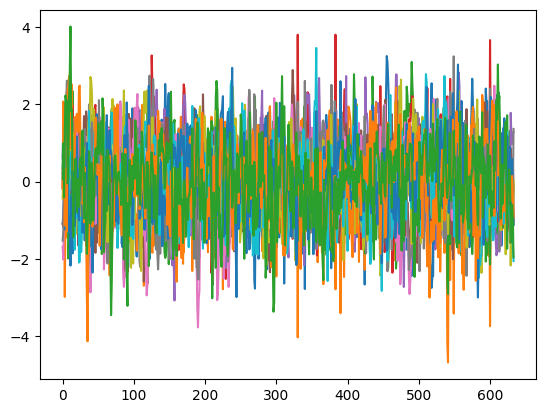

In [1187]:
plot_normal_MFCC(norma_mfcc)

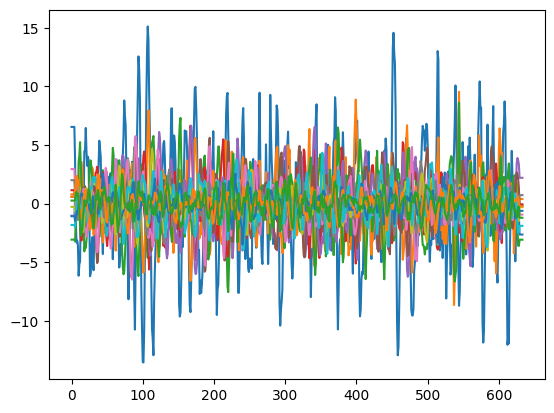

In [1188]:
plot_normal_MFCC(delta1)

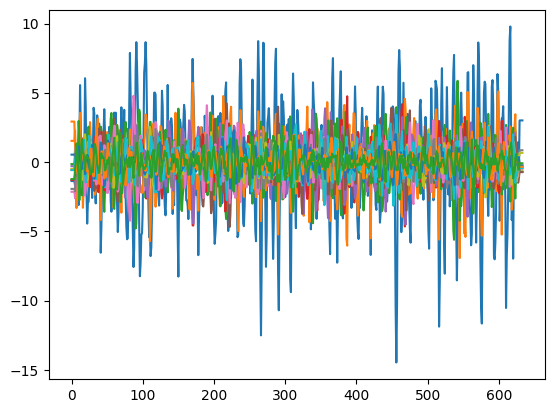

In [1189]:
plot_normal_MFCC(delta2)

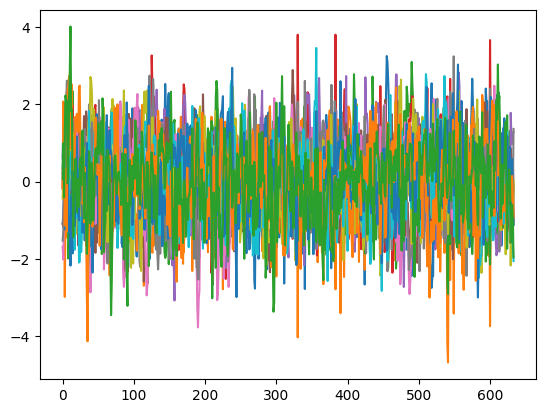

In [1190]:
plot_normal_MFCC(norma_mfcc, invert=True)

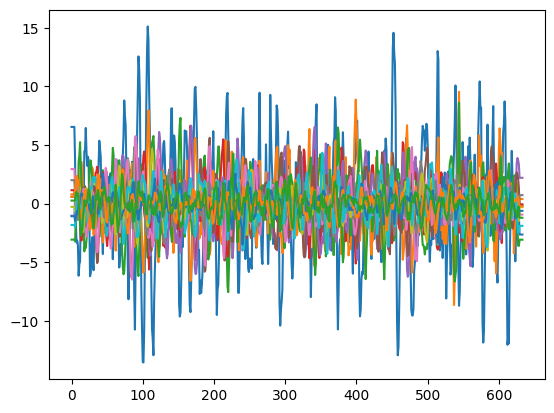

In [1191]:
plot_normal_MFCC(delta1, invert=True)

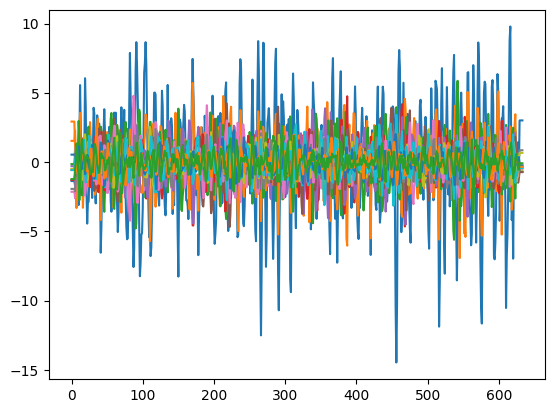

In [1192]:
plot_normal_MFCC(delta2, invert=True)

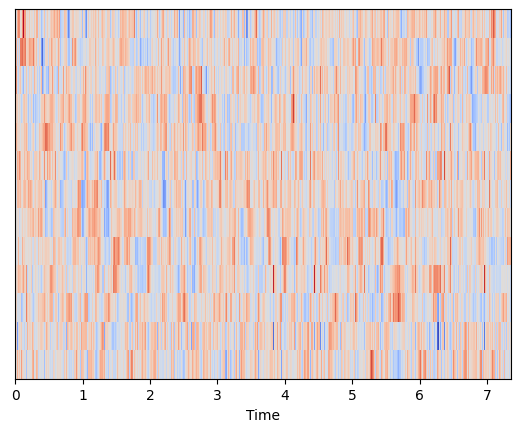

In [1193]:
plot_MFCC(norma_mfcc, sample_rate)

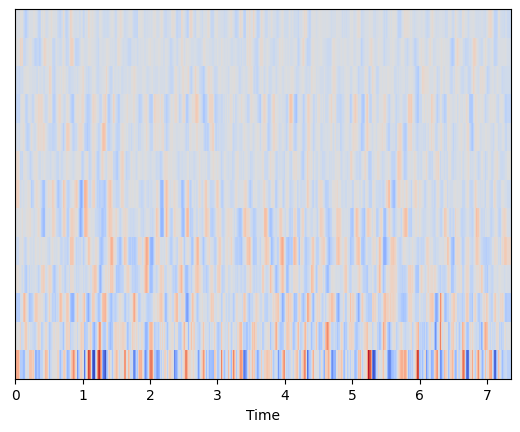

In [1194]:
plot_MFCC(delta1, sample_rate)

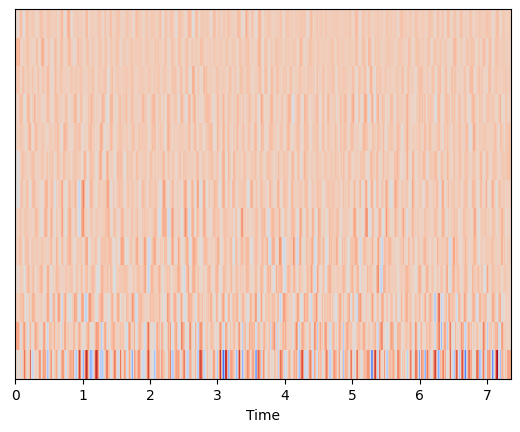

In [1195]:
plot_MFCC(delta2, sample_rate)

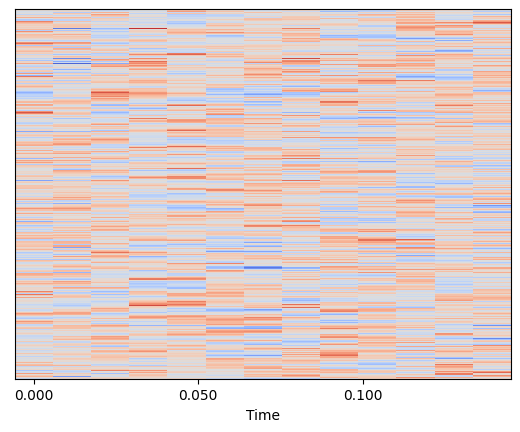

In [1196]:
plot_MFCC(norma_mfcc, sample_rate, invert=True)

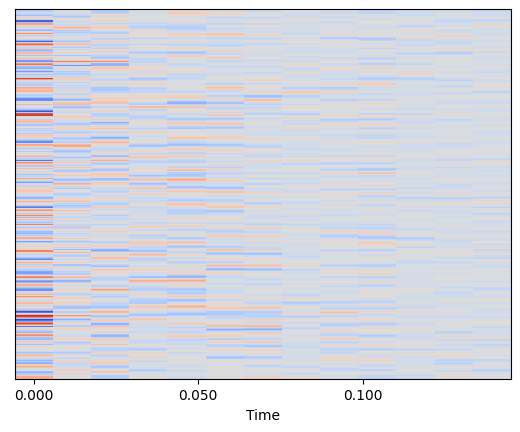

In [1197]:
plot_MFCC(delta1, sample_rate, invert=True)

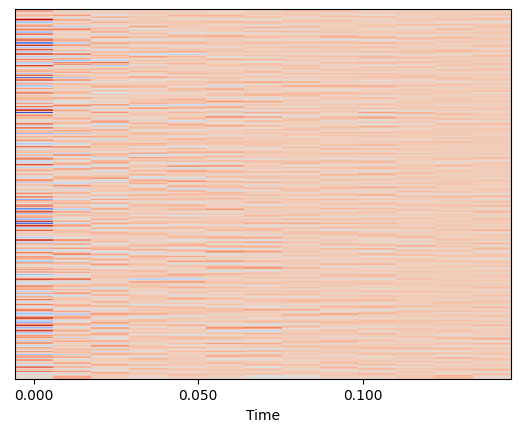

In [1198]:
plot_MFCC(delta2, sample_rate, invert=True)

In [1199]:
type(mfcc_run), type(delta1), type(delta2)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [1200]:
mfcc_run.shape, delta1.shape, delta2.shape

((13, 634), (13, 634), (13, 634))

In [1201]:
conct = np.concatenate((mfcc_run, delta1, delta2), axis=0)

In [1202]:
norm_concact = normalize_MFCC(conct)

In [1203]:
conct.shape, norm_concact.shape

((39, 634), (39, 634))

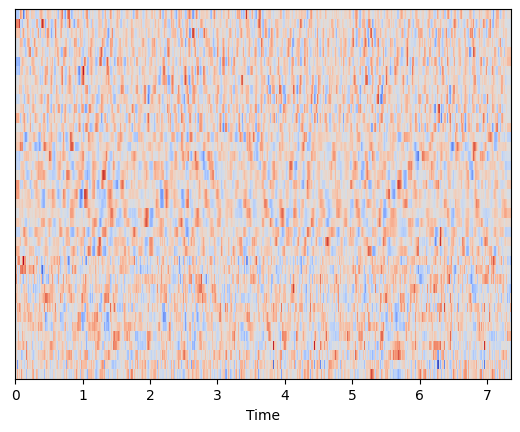

In [1204]:
plot_MFCC(norm_concact, sample_rate)

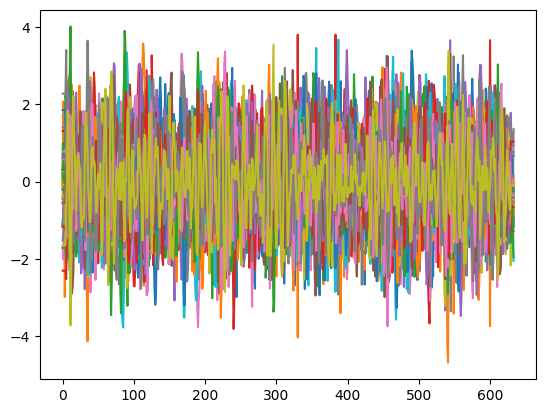

In [1205]:
plot_normal_MFCC(norm_concact)